In [150]:
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from unet import unet_model

In [151]:
image_directory = 'data/training/'
mask_directory = 'data/ground_truth/'
SIZE = 256
image_dataset = []
mask_dataset = []

images = os.listdir(image_directory)
images = sorted(images)
print(images)
for i, image_name in enumerate(images):
    if (image_name.split('.')[-1] == 'png'):
        image = cv2.imread(image_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image_dataset.append(np.array(image))

masks = os.listdir(mask_directory)
masks = sorted(masks)
print(masks)
for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(mask_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        mask_dataset.append(np.array(image).astype(bool))

# for i, image_name in enumerate(masks):
#     if (image_name.split('.')[1] == 'png'):
#         image = cv2.imread(mask_directory+image_name, 0)
#         image = Image.fromarray(image)
#         image = image.resize((SIZE, SIZE))
#         mask_dataset.append(np.array(image))


['img10_20230125_KPN005_25mMMgCl2_Vac.0_00006.png', 'img10_augmented_left.png', 'img10_augmented_right.png', 'img10_augmented_upsidedown.png', 'img11_20230125_KPN005_25mMMgCl2_Vac.0_00024.png', 'img12_20230125_KPN005_25mMMgCl2_Vac.0_00028.png', 'img13_20230126_KPN005_25mMMgCl2_Vac_24hr.0_00004.png', 'img14_20230126_KPN005_25mMMgCl2_Vac_24hr.0_00013.png', 'img15_20230126_KPN005_25mMMgCl2_Vac_24hr.0_00019.png', 'img16_20230126_KPN005_25mMMgCl2_Vac_24hr.0_00024.png', 'img17_20230126_KPN005_25mMMgCl2_Vac_24hr.0_00026.png', 'img18_20230217_KPN010_25mMMgCl2_HRinse_Vacuum(crop).0_00010.png', 'img19_20230314_KPN015_25mMMgCl2_0.0_00016.png', 'img1_20230118_KPN001_25mMMgCl2_Vac(2)_noscale.0_00005.png', 'img2_20230118_KPN001_25mMMgCl2_Vac(2).0_00009.png', 'img3_20230118_KPN001_25mMMgCl2_Vac(2).0_00011.png', 'img4_20230118_KPN001_25mMMgCl2_Vac(2).0_00020.png', 'img5_20230118_KPN001_25mMMgCl2_Vac(2).0_00023.png', 'img6_20230118_KPN001_25mMMgCl2_Vac(2).0_00027.png', 'img7_20230124_KPN004_12(5)mMMgCl

22
22
[False  True]
(256, 256)


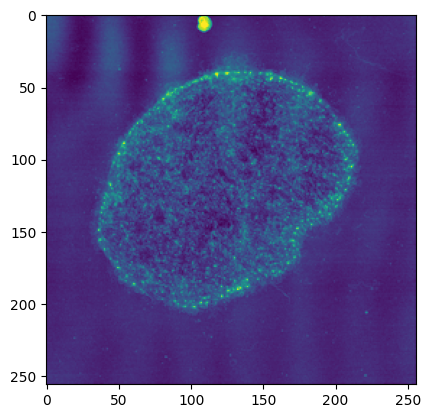

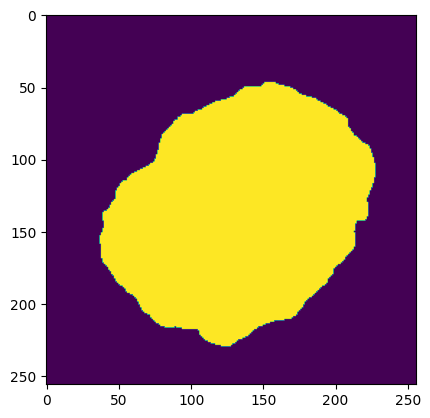

In [152]:
print(len(image_dataset))
print(len(mask_dataset))
print(np.unique(mask_dataset[0]))
plt.imshow(image_dataset[3])
print(np.shape(image_dataset[0]))
plt.show()
plt.imshow(mask_dataset[3])


In [153]:
# Normalise the training images. The images are in 0-255 range with 3 channels
# 1600, 256, 256, 1
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1), 3)
# Do not normalize the masks, just rescale them to 0-1 range, because they do not have 3 colour channels.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3)

print(image_dataset.shape)
print(mask_dataset.shape)
print(np.unique(image_dataset))
print(np.max(image_dataset))
print(np.unique(mask_dataset))

(22, 256, 256, 1)
(22, 256, 256, 1)
[0.         0.0004002  0.00040087 ... 0.30681027 0.31017652 0.3138752 ]
0.31387520409237846
[False  True]


In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size=0.10, random_state=0)

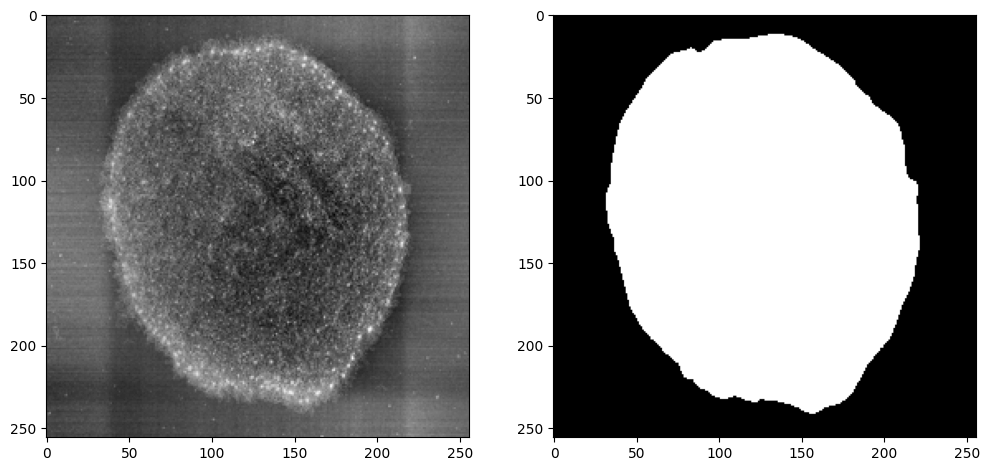

In [155]:
# Check things are working correctly
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256, 256)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256, 256)), cmap='gray')
plt.show()

In [156]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

def get_model():
    return unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model = get_model()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_76 (Conv2D)             (None, 256, 256, 16  160         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_36 (Dropout)           (None, 256, 256, 16  0           ['conv2d_76[0][0]']              
                                )                                                           

In [ ]:
# Can load the model:
# model.load_weights('mitochondria_test.hdf5')

In [157]:
history = model.fit(
    X_train,
    y_train,
    batch_size=2,
    verbose=1,
    epochs=50,
    validation_data=(X_test, y_test),
    shuffle=False
)

model.save('kDNA_test.hdf5')

Epoch 1/50


2023-03-19 14:15:35.302820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - ETA: 0s - loss: 0.6803 - accuracy: 0.6288

2023-03-19 14:15:38.650577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 4s 269ms/step - loss: 0.6803 - accuracy: 0.6288 - val_loss: 0.6904 - val_accuracy: 0.6234
Epoch 2/50
10/10 [==============================] - 1s 105ms/step - loss: 0.6419 - accuracy: 0.6505 - val_loss: 1.1889 - val_accuracy: 0.6234
Epoch 3/50
10/10 [==============================] - 1s 79ms/step - loss: 0.7645 - accuracy: 0.6223 - val_loss: 0.6770 - val_accuracy: 0.6234
Epoch 4/50
10/10 [==============================] - 1s 78ms/step - loss: 0.6439 - accuracy: 0.6438 - val_loss: 0.6609 - val_accuracy: 0.6234
Epoch 5/50
10/10 [==============================] - 1s 71ms/step - loss: 0.6206 - accuracy: 0.6941 - val_loss: 0.6743 - val_accuracy: 0.6234
Epoch 6/50
10/10 [==============================] - 1s 86ms/step - loss: 0.6256 - accuracy: 0.6518 - val_loss: 0.6255 - val_accuracy: 0.6234
Epoch 7/50
10/10 [==============================] - 1s 91ms/step - loss: 0.5635 - accuracy: 0.7031 - val_loss: 0.8674 - val_accuracy: 0.6234
Epoch 8/50
10/10 [====

In [158]:
# Check model accuracy
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

1/1 [==============================] - 1s 544ms/step - loss: 0.1524 - accuracy: 0.9679
Accuracy =  96.79362177848816 %


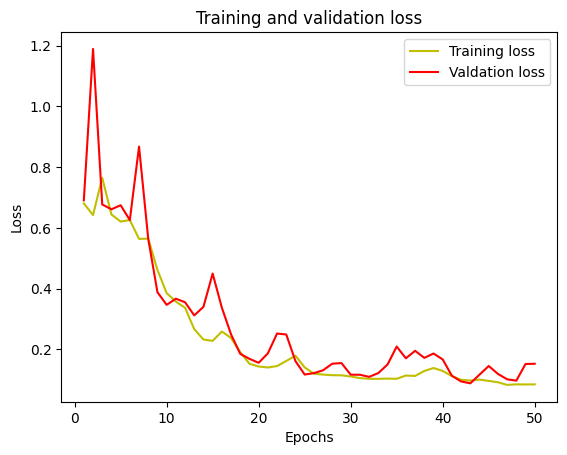

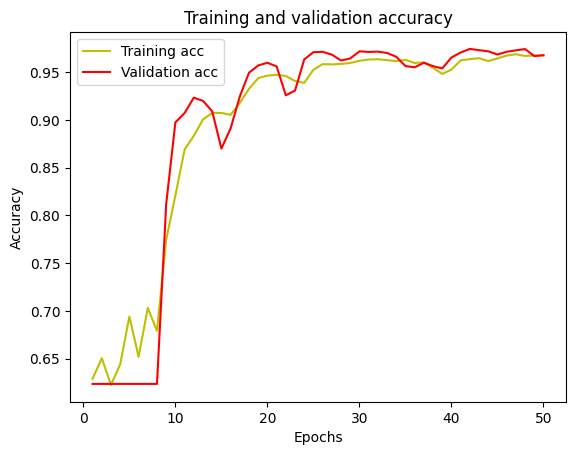

In [159]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Valdation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [160]:
# Note that for semantic segmentation, accuracy is not the correct metric.

# Calculate IOU
y_pred = model.predict(X_test)
y_pred_thresholded = y_pred > 0.5 # this value is a probability cutoff

intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print(f"IoU score: {iou_score}")

2023-03-19 14:16:30.836536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 385ms/step
IoU score: 0.9157230518308579


1/1 [==============================] - 0s 16ms/step


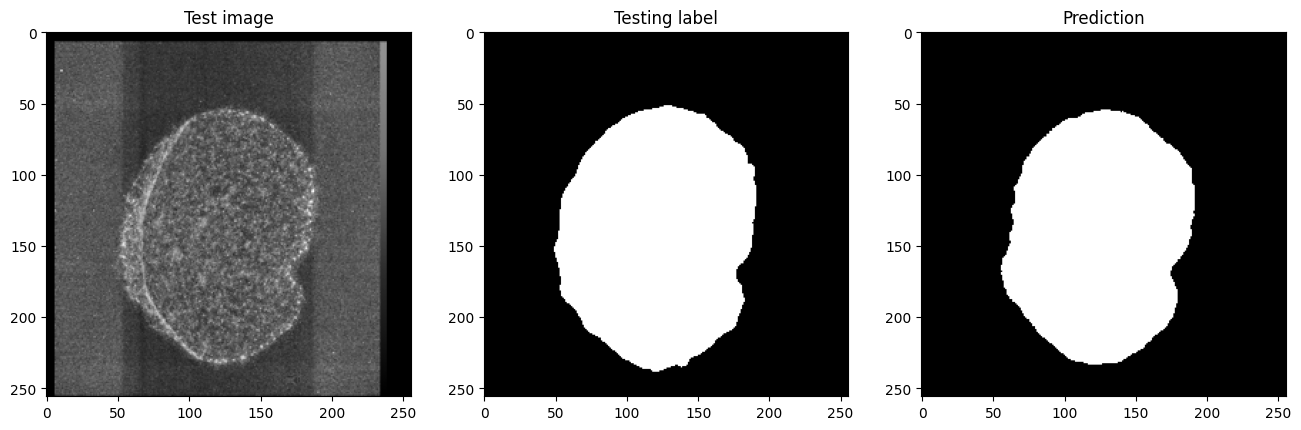

In [169]:
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:, :, 0][:, :, None]
test_img_input = np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input)[0, :, :, 0] > 0.5).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.title('Test image')
plt.imshow(test_img[:, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(ground_truth[:, :, 0], cmap='gray')
plt.title('Testing label')
plt.subplot(133)
plt.imshow(prediction, cmap='gray')
plt.title('Prediction')
plt.show()